# Applied Data Visualization – Homework 3
*https://www.dataviscourse.net/2023-applied/*


In this homework we will create tabular custom charts in Matplotlib and Seaborn. 



## Your Info and Submission Instructions

* *First name:* Kolton
* *Last name:* Hauck
* *Email:* kolton.hauck@utah.edu
* *UID:* u1019364



For your submission, please do the following things: 
* **rename the file to `hw3_lastname.pynb`**
* **include all files that you need to run the homework, including the data file provided** 
* **don't use absolute paths, but usea relative path to the same directory for referencing data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Useful for this homework
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D

plt.style.use('default')
# This next line tells jupyter to render the images inline
%matplotlib inline
import matplotlib_inline
# This renders your figures as vector graphics AND gives you an option to download a PDF too
matplotlib_inline.backend_inline.set_matplotlib_formats('svg', 'pdf')

# Part 1: Bubble Grid Chart

For this assignment, we will use a historical data set of medals awarded in Winter Olympics. Recreate the chart below using Matplotlib with the following requirements:

- Each `Discipline` bubble and label should be colored according to the `Sport` variable. You can pick your own colors, as long as they are discernable.
- Each bubble's size should depend on the number of gold medals awarded. (This can be calculated as the number of unique `Event`-`Gender` pairs in the data set.)
- There should be a label noting that 1940 and 1944 Olympic games were not held (due to World War II).

![A bubble grid chart of medals for winter olympics](medals.svg)

Hints you may find useful for this assignment:
- matplotlib's `.patch.Rectangle` and `.add_patch()` for the label box
- matplotlib's `.get_yticklabels()`, `.get_text()`, and `.set_color()` to color the y-axis labels

In [193]:
# Keep this cell
medals_df = pd.read_csv('./winter.csv')
medals_df.sort_values(by='Sport', inplace=True)

cmap_name = 'tab20b'

fig, subfig = plt.subplots(1,1, figsize=(12,6))
years = medals_df.Year
disciplines = medals_df.Discipline
years_l = pd.unique(years.copy())
years_l.sort()

sports_l = pd.unique(medals_df.Sport.to_list())
sports_i_points = [np.where(sports_l == sport)[0] for sport in medals_df.Sport.to_list()]
sports_i_labels = [np.where(sports_l == sport)[0][0] for sport in medals_df[['Discipline', 'Sport']].drop_duplicates()['Sport'].to_list()]

#get number of gold medals per year/sport
gold_medals = {}
for year in years:
    gold_medals[year] = {}
    for sport in sports_l:
        gold_medals[year][sport] = 0
        
for i, row in medals_df.iterrows():
    if row.Medal == 'Gold':
        gold_medals[row.Year][row.Sport] += 1
n_Gold = medals_df.apply(lambda row: tmp[row['Year']][row['Sport']], axis=1)


subfig.scatter(years, disciplines, s=n_Gold*2, alpha=0.7, cmap=cmap_name, c=sports_i_points)

subfig.yaxis.tick_right()
subfig.xaxis.tick_top()
for lab in range(len(subfig.get_yticklabels())):
    subfig.get_yticklabels()[lab].set_color(plt.get_cmap(cmap_name, 7)(sports_i_labels[lab]))
subfig.set_xticks(ticks=years_l, labels=years_l, rotation=45)

# create/add rectangle
rect_x = 1938
rect_y = -1
rect_width = 8
rect_height = len(pd.unique(medals_df.Discipline)) +1

rectangle = Rectangle((rect_x, rect_y), rect_width, rect_height, fill=True, facecolor='gray', linewidth=0)
fig.gca().add_patch(rectangle)

#add text to rectangle
text_x = rect_x + rect_width / 2
text_y = rect_y + rect_height / 2
text = "Games Not\nHeld"
subfig.text(text_x, text_y, text, ha='center', va='center', color='black', fontsize=8)


Text(1942.0, 7.0, 'Games Not\nHeld')

# Part 2: Parallel Coordinates

We're back to the familiar Utah Avalanche Center data set for this assignment. Recreate the parallel coordinates chart below using Matplotlib, given the following requirements:

- Subset the data to avalanches caused by skiers in Salt Lake between 2015 and today.
- Highlight (e.g., with another color) avalanches with casualties (i.e. anyone injured, killed, or buried).
- Add a custom legend explaining the highlighting.
- Each axis should range from the minimum to the maximum value of the corresponding variable in the data.

![A parralel coordinates plot of avalance data with fatalities highlighted.](pc.svg)

Hints you may find useful:
- Drop rows that have NaN values in the columns you want to plot.
- Matplotlib's `.twinx()` function is useful to create subfigures that share the same x-axis.
- Note that the ranges of variables are very different. For the lines to fit onto the same chart, all variables should be *normalized* to the range of one variable (for example, if you choose the leftmost variable---year---to be the reference, all other variables should be normalized to range between 2015 and 2023).
- Make sure you first draw the axes, and only then normalize variables to the reference, and then draw.
- You may find it useful to loop over all observations (rows) and `.plot()` each line individually.
- Note that since we are plotting each line individually, matplotlib will not generate a legend. Refer to [the documentation](https://matplotlib.org/stable/gallery/text_labels_and_annotations/custom_legends.html. ) for guidance on how to create a custom legend.

In [3]:
# Keep this cell

avy_df = pd.read_csv('./avalanches.csv')

# Clean dates and elevation
avy_df['Date'] = pd.to_datetime(avy_df['Date'])
avy_df['Year'] = avy_df['Date'].dt.year.astype('Int64')
avy_df['Month'] = avy_df['Date'].dt.month.astype('Int64')
avy_df['Elevation_Feet'] = pd.to_numeric(avy_df['Elevation'].str.replace('\'', '').str.replace(',', ''))
avy_df['Width_Feet'] = pd.to_numeric(avy_df['Width'].str.replace('\'', '').str.replace(',', ''))
avy_df['Vertical_Feet'] = pd.to_numeric(avy_df['Vertical'].str.replace('\'', '').str.replace(',', ''))

def CleanInchesFeet(x):

    if x!=x: return x

    number = pd.to_numeric(x[:-1].replace(',', ''))
    unit = x[-1]

    if unit == '\"':
        return number
    elif unit == '\'':
        return number*12
    else:
        return float('NaN')
    
avy_df['Depth_Inches'] = avy_df['Depth'].map(lambda x: CleanInchesFeet(x))

# Filter out null dates and incomplete years
avy_df = avy_df[avy_df['Date']==avy_df['Date']]
avy_df = avy_df[avy_df['Year'] > 2015]

In [4]:
#Subset the data to avalanches caused by skiers in Salt Lake between 2015 and today
avy_df = avy_df[avy_df.Trigger == 'Skier']
avy_df = avy_df[avy_df.Region == 'Salt Lake']

casualties = avy_df[~(avy_df.Killed.isna() & avy_df.Injured.isna() & avy_df['Buried - Partly'].isna() & avy_df['Buried - Fully'].isna())]

avy_df = avy_df[['Year', 'Elevation_Feet', 'Vertical_Feet', 'Width_Feet', 'Depth_Inches']]
avy_df.dropna(inplace=True)

casualties = [True if ind in casualties.index.to_list() else False for ind in avy_df.index.to_list()]

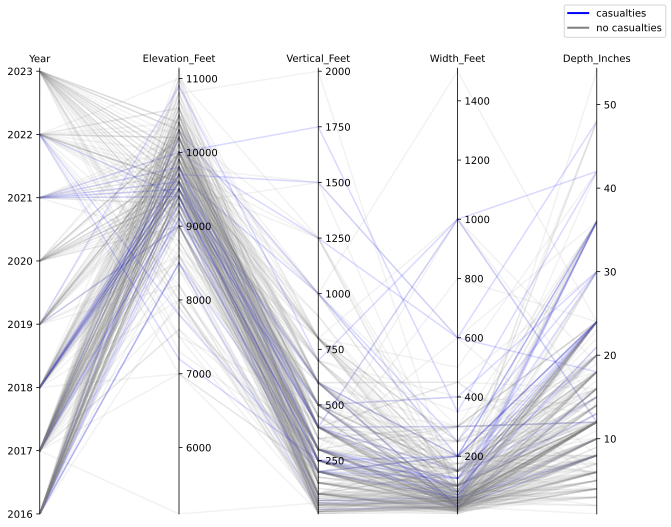

In [5]:
#followed structure to using twinx() from: https://stackoverflow.com/questions/8230638/parallel-coordinates-plot-in-matplotlib
fig, subfig = plt.subplots(figsize=(10,8))

subfigs = [subfig] + [subfig.twinx() for i in range(1, 5)]

ymins = [avy_df[col].min() for col in avy_df.columns]
ymaxs = [avy_df[col].max() for col in avy_df.columns]

for i,subf in enumerate(subfigs):
    subf.spines[['top', 'bottom']].set_visible(False)
    subf.set_ylim(ymins[i], ymaxs[i])
    if subf != subfig:
        subf.spines['left'].set_visible(False)
        subf.yaxis.set_ticks_position('right')
        subf.spines['right'].set_position(('axes', i/4))

subfig.set_xlim(0, 4)
subfig.set_xticks(range(5))
subfig.set_xticklabels(avy_df.columns)
subfig.xaxis.tick_top()
subfig.spines['right'].set_visible(False)

#normalize: valuenew = (maxnew - minnew)/(maxold - minold) * (valueold - maxold) + maxnew
max_new = avy_df.Year.max()
min_new = avy_df.Year.min()

EF_plot = (max_new - min_new) / (avy_df.Elevation_Feet.max() - avy_df.Elevation_Feet.min()) * (avy_df.Elevation_Feet - avy_df.Elevation_Feet.max()) + max_new
VF_plot = (max_new - min_new) / (avy_df.Vertical_Feet.max() - avy_df.Vertical_Feet.min()) * (avy_df.Vertical_Feet - avy_df.Vertical_Feet.max()) + max_new
WF_plot = (max_new - min_new) / (avy_df.Width_Feet.max() - avy_df.Width_Feet.min()) * (avy_df.Width_Feet - avy_df.Width_Feet.max()) + max_new
DI_plot = (max_new - min_new) / (avy_df.Depth_Inches.max() - avy_df.Depth_Inches.min()) * (avy_df.Depth_Inches - avy_df.Depth_Inches.max()) + max_new
years= avy_df.Year.to_list()

for i in range(len(years)):
    if not casualties[i]:
        subfig.plot([0, 1], [years[i], EF_plot.iloc[i]], 'gray', alpha=0.1)
        subfig.plot([1, 2], [EF_plot.iloc[i], VF_plot.iloc[i]], 'gray', alpha=0.1)
        subfig.plot([2, 3], [VF_plot.iloc[i], WF_plot.iloc[i]], 'gray', alpha=0.1)
        subfig.plot([3, 4], [WF_plot.iloc[i], DI_plot.iloc[i]], 'gray', alpha=0.1)
    else:
        subfig.plot([0, 1], [years[i], EF_plot.iloc[i]], 'blue', alpha=0.15)
        subfig.plot([1, 2], [EF_plot.iloc[i], VF_plot.iloc[i]], 'blue', alpha=0.15)
        subfig.plot([2, 3], [VF_plot.iloc[i], WF_plot.iloc[i]], 'blue', alpha=0.15)
        subfig.plot([3, 4], [WF_plot.iloc[i], DI_plot.iloc[i]], 'blue', alpha=0.15)

fig.subplots_adjust(wspace=0)

#asked chatgpt ('how to explicitly define legend with colors and labels') for help on legend
custom_legend_handles = [
    Line2D([0], [0], color='blue', lw=2),
    Line2D([0], [0], color='gray', lw=2)
]
legend_labels = ['casualties', 'no casualties']

fig.legend(custom_legend_handles, legend_labels)

## Part 3: Scatterplot Matrix

Use seaborn to show a scaterplott matrix of the data you used in Part 2. Make the dots transparent to see which areas are heavily overplotted. 

Hints: 
 * this is one line of code.
 * showing a histogram in the diagonals (instead of a KDE plot) gets around a bug that occurs when using a KDE plot with this dataset

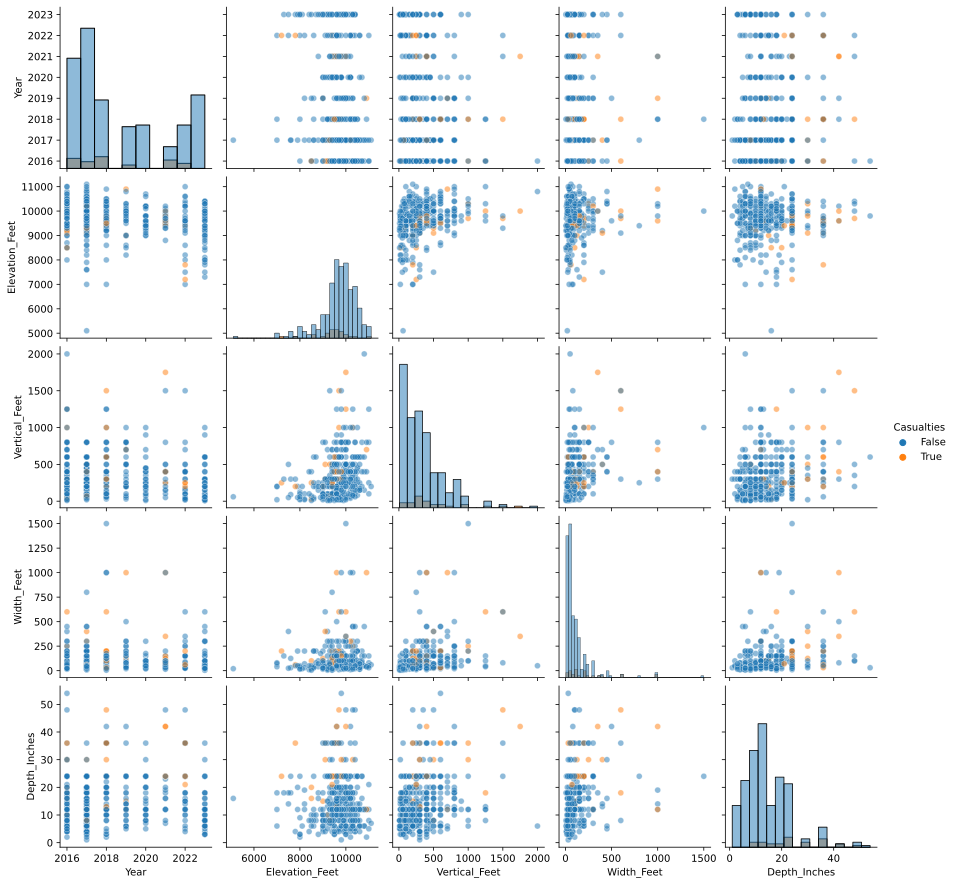

In [7]:
import seaborn as sns

avy_df['Casualties'] = casualties

sns.pairplot(avy_df, hue='Casualties', diag_kind='hist', plot_kws={'alpha':0.5})

## Part 4: Analysis and Comparison

* Analyze the data; under which conditions do casualties occur?



* Compare the scatterplot matrix with the PCP plot. Do you see different patterns in the visualization for this datasets? What are the strengths and weaknesses of each plot? 
  

under which conditions do casualties occur?

* higher depth (inches)
* higher elevation
* seems like there might be less casaulties more recently (should have more years to support this)


Do you see different patterns in the visualization for this datasets? What are the strengths and weaknesses of each plot? 

scatterplot
* strength: pairwise relationships
* strength: intuitive to read
* strength: distributions
* strength: fairly compact
* strength: easy to implement
* weakness: not suitable for high feature dataset
* weakness: can be hard to see patterns for high-d dataset

PCP
* strength: condensed
* strength: groupings/patterns
* strength: categorical data
* weakness: difficult to make
* weakness: can be hard to see patterns for high-d dataset

# Grading Scheme

Part 1: 40%  
Part 2: 40%  
Part 3: 10%  
Part 4: 10%